# Employee Churn Analysis

* The folllowing dataset contains the information of 15.000 employees of a company. Each record represents an employee.

https://www.kaggle.com/datasets/jacksonchou/hr-data-for-analytics


## About the data:

Variables description :

Dependent variable

* Left : 1 if employee left company, 0 if not left the company

Independent variables

* satisfaction_level : how much employee satisfied (0 less satisfied , 1 most satisfied)

* last_evaluation : means employees evaluation for last month (0 bad , 1 Excellent)

* number_project : number of projects the employee worked on

* average_montly_hours : average hours employee spends at work per month

* time_spend_company : years the employee spent in a company

* Work_accident : 1 if had at least one, 0 if he did not have an accident 

* promotion_last_5years : 1 if had at least one, 0 if he did not have any promotion in last 5 years

* Department : department in which employee works

In [ ]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HR_Data.csv')

## Quick visualization of the data

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Visualizing some information about the features

How much time the employees stay in the company?

In [ ]:
print(f'In mean the employees stay just {df["time_spend_company"].mean():.2f} years in the compay.')

In mean the employees stay just 3.50 years in the compay.


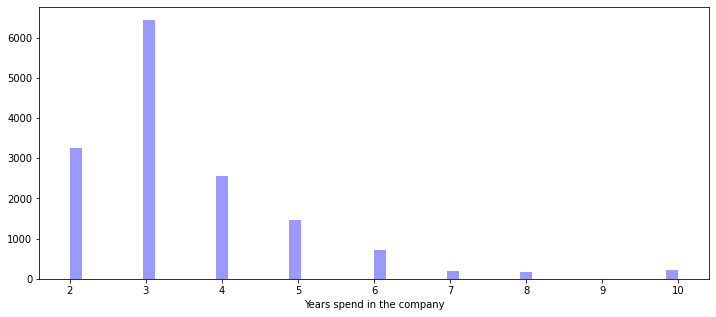

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['time_spend_company'], kde=False, color='b', axlabel='Years spend in the company')

What about the satisfaction level?

In [ ]:
print(f'In median {df["satisfaction_level"].median()*100:.2f}% of the employees are satisfied with the company.')

In median 64.00% of the employees are satisfied with the company.


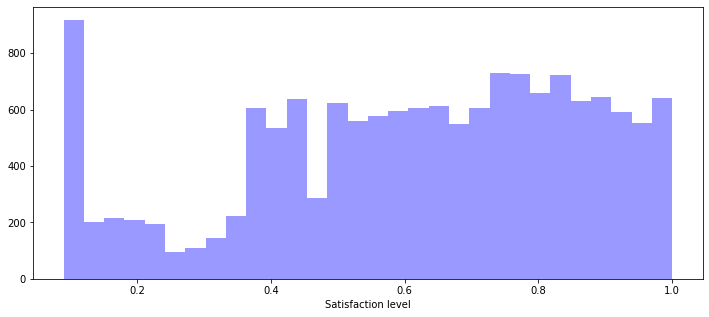

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['satisfaction_level'],kde=False, color='b', axlabel='Satisfaction level')

Average montly hours worked in this company

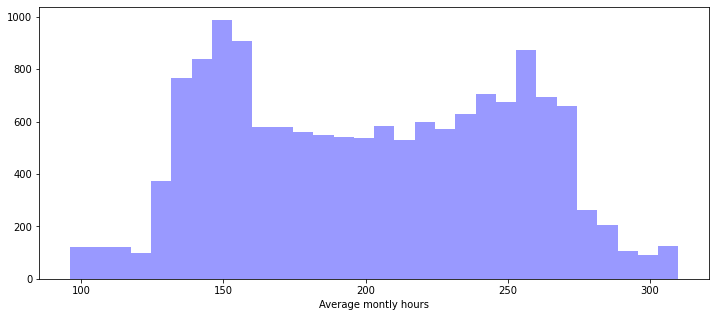

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['average_montly_hours'],kde=False, color="b", axlabel='Average montly hours')

In [ ]:
#How many emplooyes the compay have by department
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

## Using seaborn countplot and pandas groupby method

Lowest and highest salary by department

In [ ]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

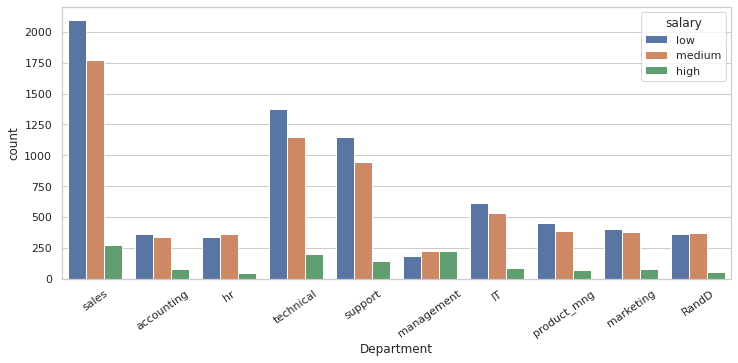

In [ ]:
plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid")
sns.countplot(x='Department', hue='salary', data=df)
plt.xticks(rotation=35)
plt.show()

In [ ]:
salary_data = df.groupby(['Department', 'salary'])['salary'].count()
salary_data

Department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

How many employees left the company by department
* 1 for those who left the company
* 0 for those who stay in the company

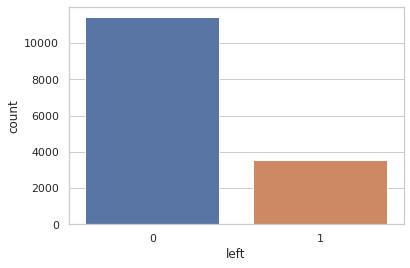

In [ ]:
sns.countplot(df['left'])

By department

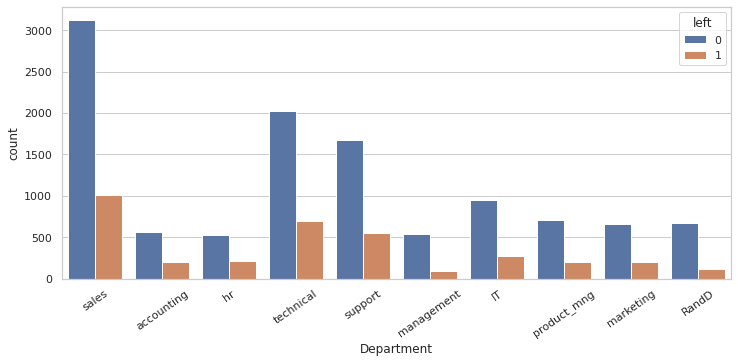

In [ ]:
plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid")
sns.countplot(x='Department', hue='left', data=df)
plt.xticks(rotation=35)
plt.show()

In [ ]:
left_data = df.groupby(['Department', 'left'])['left'].count()
left_data

Department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: left, dtype: int64

In [ ]:
left_data.unstack(level=0)

Department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


Why are employees leaving the company?

A small portion of people who earned high salaries left the company, the largest number of people who left the company received low salaries.


In [ ]:
df.groupby(['salary', 'left'])['left'].count()

salary  left
high    0       1155
        1         82
low     0       5144
        1       2172
medium  0       5129
        1       1317
Name: left, dtype: int64

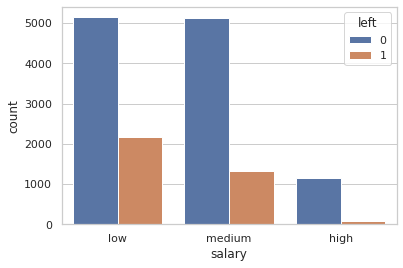

In [ ]:
sns.countplot(x='salary', hue='left',data=df)

An even smaller portion who received a promotion in the last 5 years have left the company

In [ ]:
df.groupby(['promotion_last_5years', 'left'])['left'].count()

promotion_last_5years  left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
Name: left, dtype: int64

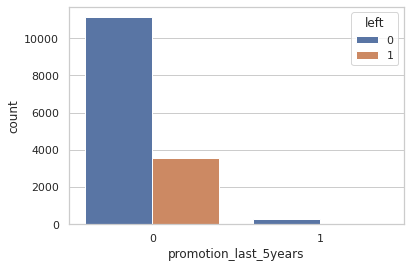

In [ ]:
sns.countplot(x='promotion_last_5years', hue='left', data=df)

As we can see the low wages and the lack of promotion could be a reason for employees leave the company


Let's see more about the projects that each area is dealing with

In [ ]:
df.groupby('Department')['number_project'].sum()

Department
IT              4683
RandD           3033
accounting      2934
hr              2701
management      2432
marketing       3164
product_mng     3434
sales          15634
support         8479
technical      10548
Name: number_project, dtype: int64

In [ ]:
df.groupby(['Department', 'left'])['number_project'].sum()

Department   left
IT           0        3584
             1        1099
RandD        0        2546
             1         487
accounting   0        2144
             1         790
hr           0        1940
             1         761
management   0        2055
             1         377
marketing    0        2437
             1         727
product_mng  0        2672
             1         762
sales        0       11845
             1        3789
support      0        6334
             1        2145
technical    0        7717
             1        2831
Name: number_project, dtype: int64

So with this information we can see for example that the majority of emplooyes who left the sales department was not maing much of the projects

Analysis with pivot table


In [ ]:
pivot = df.pivot_table(index=['Department', 'promotion_last_5years'], columns='left', aggfunc='count')
pivot

Work_accident         average_montly_hours  \
left                                          0       1                    0   
Department  promotion_last_5years                                              
IT          0                             954.0   270.0                954.0   
            1                               NaN     3.0                  NaN   
RandD       0                             639.0   121.0                639.0   
            1                              27.0     NaN                 27.0   
accounting  0                             549.0   204.0                549.0   
            1                              14.0     NaN                 14.0   
hr          0                             509.0   215.0                509.0   
            1                              15.0     NaN                 15.0   
management  0                             473.0    88.0                473.0   
            1                              66.0     3.0                 66.0   
marketing   0                             612.0   203.0                612.0   
            1                              43.0     NaN                 43.0   
product_mng 0                             704.0   198.0                704.0   
sales       0                            3033.0  1007.0               3033.0   
            1                              93.0     7.0                 93.0   
support     0                            1657.0   552.0               1657.0   
            1                              17.0     3.0                 17.0   
technical   0                            1998.0   694.0               1998.0   
            1                              25.0     3.0                 25.0   

                                          last_evaluation          \
left                                    1               0       1   
Department  promotion_last_5years                                   
IT          0                       270.0           954.0   270.0   
            1                         3.0             NaN     3.0   
RandD       0                       121.0           639.0   121.0   
            1                         NaN            27.0     NaN   
accounting  0                       204.0           549.0   204.0   
            1                         NaN            14.0     NaN   
hr          0                       215.0           509.0   215.0   
            1                         NaN            15.0     NaN   
management  0                        88.0           473.0    88.0   
            1                         3.0            66.0     3.0   
marketing   0                       203.0           612.0   203.0   
            1                         NaN            43.0     NaN   
product_mng 0                       198.0           704.0   198.0   
sales       0                      1007.0          3033.0  1007.0   
            1                         7.0            93.0     7.0   
support     0                       552.0          1657.0   552.0   
            1                         3.0            17.0     3.0   
technical   0                       694.0          1998.0   694.0   
            1                         3.0            25.0     3.0   

                                  number_project          salary          \
left                                           0       1       0       1   
Department  promotion_last_5years                                          
IT          0                              954.0   270.0   954.0   270.0   
            1                                NaN     3.0     NaN     3.0   
RandD       0                              639.0   121.0   639.0   121.0   
            1                               27.0     NaN    27.0     NaN   
accounting  0                              549.0   204.0   549.0   204.0   
            1                               14.0     NaN    14.0     NaN   
hr          0                              509.0   215.0   509.0   215

Up to this point we were able to extract many insights from the employees of this company and many decisions for the future can be made from that.